# This notebook contains an example of denoising a signal using Cissa. There are multiple methods to do this in pyCissa, but this notebook deals with the Monte-Carlo surrogate approach.

In [1]:
#importing required packages
import pandas as pd
import os
dir_path = os.path.abspath('')
os.chdir('../../..')
home_path = os.path.abspath('')
os.chdir('./pycissa/processing/cissa')
from cissa import Cissa
os.chdir(home_path)

In [2]:
## Read data file  (source is the Ministry of Economy of Spain.)
data = pd.read_excel(home_path + r'/data/EPC.xlsx',sheet_name = 'Data')

In [3]:
#create the cissa object
cissa_object = Cissa(t=data['Date'],x=data['Electric power consumption in Spain'])

## 1. Monte-Carlo surrogate method to denoise

In [4]:
#Run auto denoise with L = 96 (8 years), grouping_type = 'monte_carlo' (the default), alpha = 0.05 (95%), K_surrogates = 5 (which means 5/alpha - 1 = 99 surrogates)
#surrogates = 'random_permutation'
cissa_object.auto_denoise(L=4*12, K_surrogates = 5, alpha = 0.05)

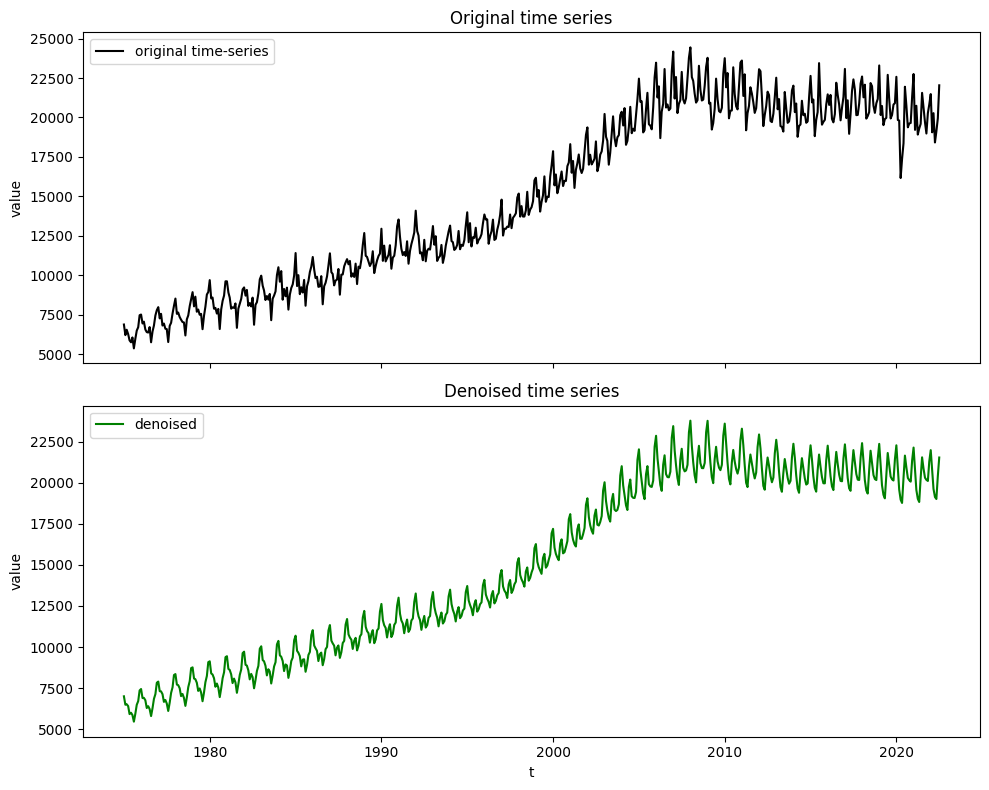

In [5]:
#plot the denoised result
cissa_object.figures.get('cissa').get('figure_denoised')


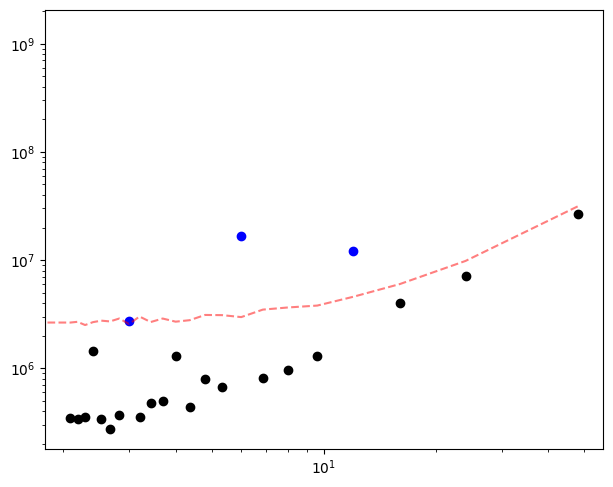

In [6]:
#plot the significant components (blue dots) which are above the line of significance (red dashed line)
#NOTE: x-axis is frequency in units of per timestep - for monthly data then 0.08333 = 1 year
cissa_object.figures.get('cissa').get('figure_monte_carlo')


In [7]:
'''Aside from the trend, there are three significant components in blue above. We can find these in the cissa results dictionary'''

'Aside from the trend, there are three significant components in blue above. We can find these in the cissa results dictionary'

In [8]:
cissa_object.results.get('cissa').keys()

dict_keys(['components', 'model parameters', 'noise component tests', 'fractal scaling results'])

In [9]:
#here we iterate through the results and find the frequencies that passed monte-carlo test.
#Note the result dictionary is structured according to input options.
#We also convert the frequency to period in years since we have monthly data
print("Trend is included in significant components.")
print(" ")
for key_j in cissa_object.results.get('cissa').get('components').keys():
    if key_j != 'trend':
        if cissa_object.results.get('cissa').get('components').get(key_j).get('monte_carlo').get('random_permutation').get('alpha').get(0.05).get('pass'):
            print("Significant CiSSA component found!")
            print(f" Frequency = {key_j} per unit timestep")
            print(f"Period = {1/(12*key_j)} years")
            print(" ")


Trend is included in significant components.
 
Significant CiSSA component found!
 Frequency = 0.08333333333333333 per unit timestep
Period = 1.0 years
 
Significant CiSSA component found!
 Frequency = 0.16666666666666666 per unit timestep
Period = 0.5 years
 
Significant CiSSA component found!
 Frequency = 0.3333333333333333 per unit timestep
Period = 0.25 years
 


In [10]:
"So trend, 1, 2, and 4 year components were found to be significant."

'So trend, 1, 2, and 4 year components were found to be significant.'

In [11]:
"We can also plot figures of each components and also the residuals/noise"

'We can also plot figures of each components and also the residuals/noise'

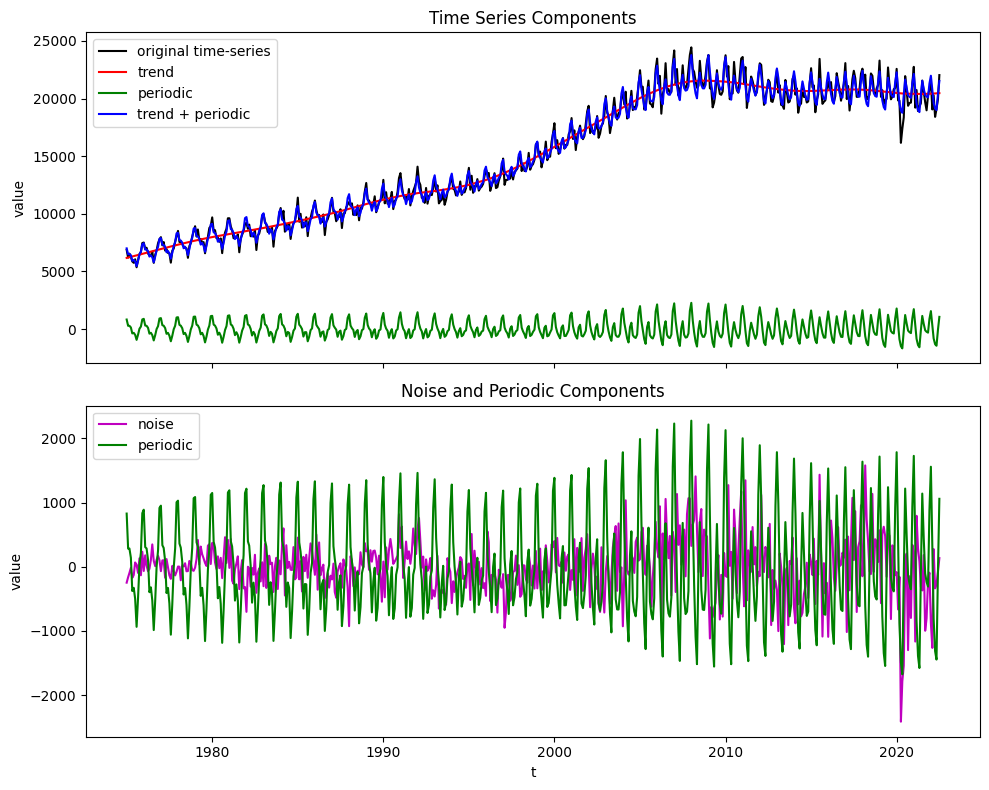

In [12]:
cissa_object.figures.get('cissa').get('figure_split_components')

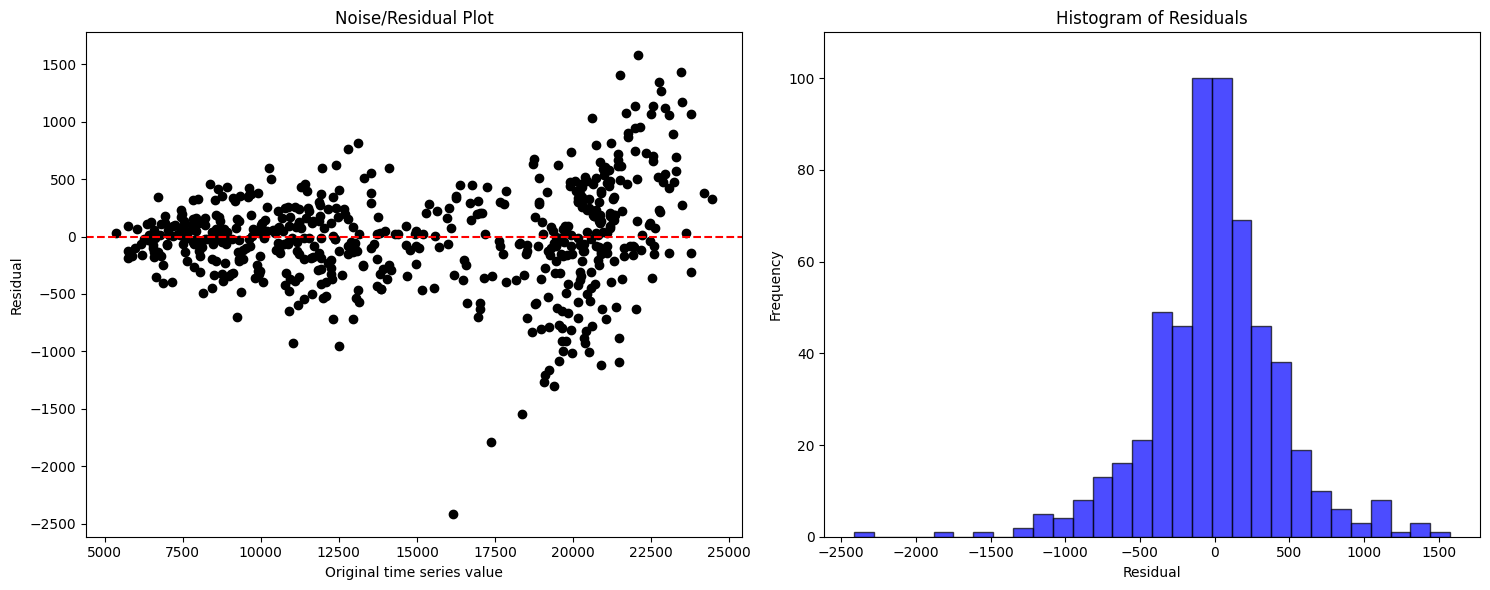

In [13]:
cissa_object.figures.get('cissa').get('figure_residual_check')

## We can get the proportion of the PSD (Power spectral density) for the trend, periodic, and noise components...


In [14]:
print('''COMPONENT VARIANCE''')
print(f'''TREND   : {cissa_object.results.get('cissa').get('noise component tests').get('trend_share')}%''')
print(f'''PERIODIC: {cissa_object.results.get('cissa').get('noise component tests').get('periodic_share')}%''')
print(f'''NOISE   : {cissa_object.results.get('cissa').get('noise component tests').get('noise_share')}%''')

COMPONENT VARIANCE
TREND   : 94.0303626803736%
PERIODIC: 2.2244441400198363%
NOISE   : 3.480421426295478%
